Тема: Графы(продолжение)

In [1]:
class Graph:
    def __init__(self): #ключами являются вершиныЮ, а значениями 
        self.graph = {}

    def add_edge(self, u, v): #U V ВЕРШИНЫ
        if u not in self.graph:
            self.graph[u] = []
        if v not in self.graph:
            self.graph[v] = []

        #добавлять вершину v в список соседей вершины u
        self.graph[u].append(v)
        #Если граф ориентированный этот шаг можно пропустить
        self.graph[v].append(u)

    def print_graph(self):

        #Печать графа: для каждой вершины выводим список соседей
        for node in self.graph:
            print(f"{node}: {self.graph[node]}")

g = Graph()

g.add_edge(0, 1)
g.add_edge(1, 4)
g.add_edge(1, 3)
g.add_edge(3, 1)

g.print_graph()

0: [1]
1: [0, 4, 3, 3]
4: [1]
3: [1, 1]


In [2]:
graph = {
    "A" : ["B", "C"],
    "B" : ["A", "D"],
    "C" : ["A", "D"],
    "D" : ["B", "C"]
}

for vertex, neighbors in graph.items(): #присоединяем к строке список
    print(f"Вершина {vertex}: {', '.join(neighbors)}")


Вершина A: B, C
Вершина B: A, D
Вершина C: A, D
Вершина D: B, C


Матрица смежности

In [3]:
graph_matrix = [
    [0, 1, 1, 0], #Вершина А соединена с вершинами В и С   это типа вершина А
    [1, 0, 0, 1], # Вершина А соединена с вершинами В и D это типа вершина B
    [1, 0, 0, 1],
    [0, 1, 1, 0]
]

for row in graph_matrix:
    print(row)

[0, 1, 1, 0]
[1, 0, 0, 1]
[1, 0, 0, 1]
[0, 1, 1, 0]


Ребра без графов:  [('Alex', 'B'), ('Alex', 'C'), ('B', 'D'), ('C', 'D')]


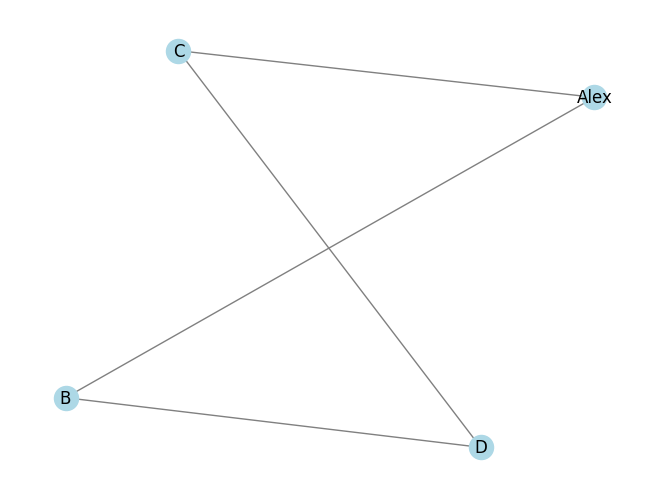

In [20]:
import networkx as nx #предназначен для работы с графами
import matplotlib.pyplot as plt # предназначена для визуализации графов

G = nx.Graph() #Создаем неориентировнный граф

#Добавляем ребра в грф. Если вершины в графе отсутствуют, то он создаст их автоматически
G.add_edges_from([("Alex", "B"), ("Alex", "C"), ("B", "D"), ("C", "D")])

print("Ребра без графов: ", G.edges())

nx.draw(G, with_labels = True, node_color="lightblue", edge_color = "gray")
plt.show()




Зубро A -> B имеет вес 4 
Зубро A -> C имеет вес 2 
Зубро B -> D имеет вес 1 


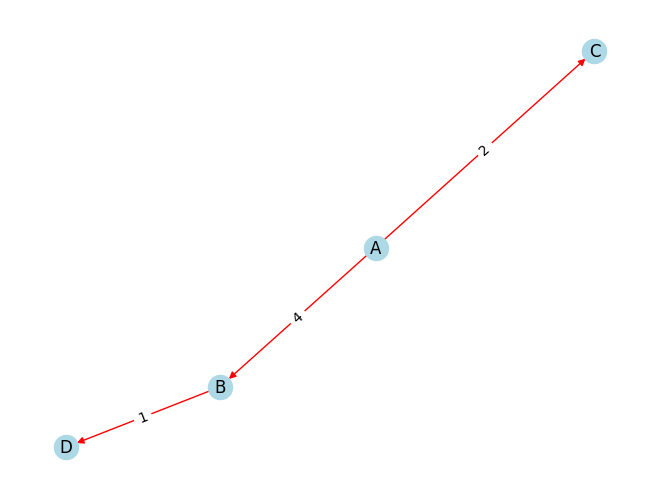

In [26]:
import networkx as nx #предназначен для работы с графами
import matplotlib.pyplot as plt # предназначена для визуализации графов

G = nx.DiGraph()

G.add_edge("A", "B", weight=4)
G.add_edge("A", "C", weight=2)
G.add_edge("B", "D", weight=1)

for u, v, data in G.edges(data=True):
    print(f"Зубро {u} -> {v} имеет вес {data['weight']} ")

pos = nx.spring_layout(G)

nx. draw(G, pos, with_labels=True, node_color="lightblue", edge_color = "red", arrows=True )

edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


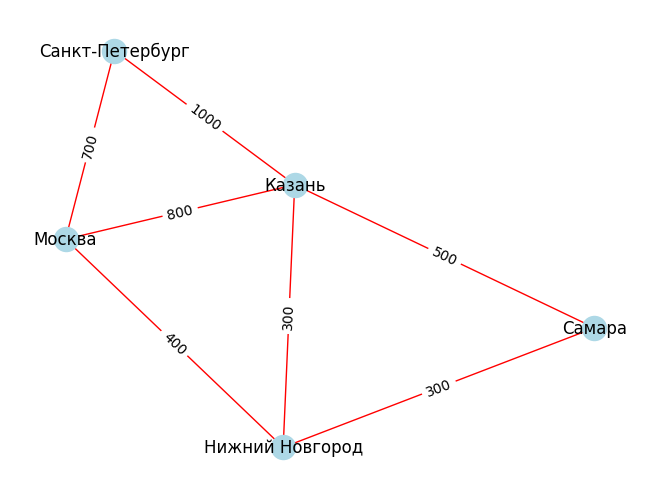

Кротчайший путь между Москвой и Самарой: ['Москва', 'Нижний Новгород', 'Самара']


In [42]:
import networkx as nx #предназначен для работы с графами
import matplotlib.pyplot as plt # предназначена для визуализации графов

G = nx.Graph()

G.add_edge("Москва", "Санкт-Петербург", weight=700)
G.add_edge("Москва", "Казань", weight=800)
G.add_edge("Москва", "Нижний Новгород", weight=400)
G.add_edge("Санкт-Петербург", "Казань", weight=1000)
G.add_edge("Казань", "Нижний Новгород", weight=300)
G.add_edge("Нижний Новгород", "Самара", weight=300)
G.add_edge("Казань", "Самара", weight=500)

pos = nx.spring_layout(G)

nx. draw(G, pos, with_labels=True, node_color="lightblue", edge_color = "red", arrows=True )

edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


shortest_path = nx.shortest_path(G, source="Москва", target="Самара")
print(f"Кротчайший путь между Москвой и Самарой: {shortest_path}")

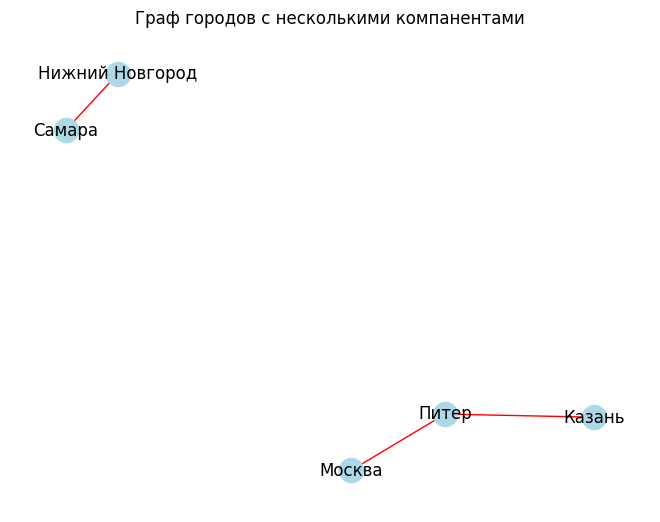

In [49]:
import networkx as nx #предназначен для работы с графами
import matplotlib.pyplot as plt # предназначена для визуализации графов

G = nx.Graph()

G.add_edges_from([("Москва", "Питер"), ("Питер", "Казань")])
G.add_edges_from([("Нижний Новгород", "Самара")])

pos = nx.spring_layout(G)

nx. draw(G, pos, with_labels=True, node_color="lightblue", edge_color = "red", arrows=True )

edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Граф городов с несколькими компанентами")
plt.show()

In [52]:
class Node:
    def __init__(self, key):
        self.left = None  # Левый дочерний узел (изначально None)
        self.right = None # Правый дочерний узел (изначально None)
        self.value = key  # Значение узла

class BinaryTree:
    def __init__(self):
        self.root = None # Инициализация дерева с пустым корнем
    
    def insert(self, key): # Метод для вставки элемента в бинарное дерево
        # Если дерево пустое, создаем корень с данным значением
        if self.root is None:
            self.root = Node(key)
        else:
            # Если дерево не пустое, вызываем рекурсивный метод вставки узлов
            self.__insert_rec(self.root, key) 
    
    def __insert_rec(self, node, key): # Рекурсивный метод для вставки элемента
        # Если ключ меньше текущего узла, вставляем в левое поддерево
        if key < node.value:
            # Если левый дочерний узел пуст, создаем новый узел
            if node.left is None:
                node.left = Node(key)
            else:
                # Иначе продолжаем рекурсивный поиск для левого поддерева
                self.__insert_rec(node.left, key)
        
        else:
            # Если ключ больше или равен текущему узлу, вставляем в правое поддерево
            if node.right is None:
                node.right = Node(key)
            else:
                # Иначе продолжаем рекурсивный поиск для правого поддерева
                self.__insert_rec(node.right, key)
    
    def inorder_traversal(self):
        # Обход дерева в порядке in-order (Левое поддерево, узел, правое поддерево)
        result = []
        self.__inorder_rec(self.root, result)
        return result

    def __inorder_rec(self, node, result):
        if node: # Проверяем, существует ли узел
            self.__inorder_rec(node.left, result) # Обходим левое дерево
            result.append(node.value) # Добавляем значение узла в результат
            self.__inorder_rec(node.right, result) # Обходим правое дерево

    def search(self, key):
        # Метод для поиска элемента в дереве
        return self.__search(self.root, key)
    
    def __search(self, node, key): # Рекурсивная функция для поиска элемента
        if node is None:
            return False # Если значение узла будет None, возвращаем False
        
        if node.value == key: # Если ключ был найден, возвращаем True
            return True
        elif key < node.value: # Мы обходим левую часть дерева
            return self.__search(node.left, key) 
        else: # Ищем в правой части дерева
            return self.__search(node.right, key)
        
    def is_empty(self): return self.root is None # Метод для проверки, пусто ли дерево

    def find_min(self):
        if self.is_empty(): return None
        return self.__find_min(self.root)

    def __find_min(self, node):
        while node.left: # Цикл, работает пока есть левые значения
            node = node.left # Присваиваем при каждой итерации левую часть
        return node.value

    def find_max(self):
        if self.is_empty():return None
        return self.__find_max(self.root)
    
    def __find_max(self,node):
        while node.right:
            node = node.right
        return node.value
    
    
    def pack_data(self):
        #Начинаем обход дерева с корня и собираем все данные в отсортированном порядкке
        return self.inorder_traversal()


    def unpack_data(self, packed_data):
        for data in packed_data:
            self.insert(data)

bt = BinaryTree()

bt.insert(5)
bt.insert(3)
bt.insert(23)
bt.insert(25)
bt.insert(15)

packed_data = bt.pack_data()
print("Упакованные данные", packed_data)

new_bt = BinaryTree()
new_bt.unpack_data(packed_data)


new_packed_data = new_bt.pack_data()
print("Распакованные данные: ", new_packed_data)





Упакованные данные [3, 5, 15, 23, 25]
Распакованные данные:  [3, 5, 15, 23, 25]


Двусвязный список


In [57]:
class Node:
    def __init__(self, data):
        self.data = data #принимаетое значение
        self.prev = None #предыдущее значение
        self.naxt = None #следующее значение

class UndoRedo:
    def __init__(self):
         self.current = None

    def add_change(self, data): #добавить изменения
        new_node = Node(data)
        if self.current is None:
            self.current = new_node

        else:
            self.current.next = new_node
            new_node.prev = self.current #Новый узел указывает на текущий узел как на предыдущий
            self.current = new_node #Обновляем current на новый узел отражакем последнее изменение 

    def undo(self):
        if self.current and self.current.prev:
            self.current = self.current.prev

        return self.current.data if self.current else None
    
    def redo(self):
        if self.current and self.current.next:
            self.current = self.current.next
        return self.current.data if self.current else None
    
ur = UndoRedo()
ur.add_change("Hello 1") #добавляем изменения
ur.add_change("Hello 2") #Обновляем значение
ur.add_change("Htllo 3") #Обновляем значение

print(ur.undo())
print(ur.undo())
print(ur.redo())
print(ur.redo())
    

    



Hello 2
Hello 1
Hello 2
Htllo 3


Куча